## Setup

In [1]:
import torchvision.transforms as tfs
from src.models.utils import download_checkpoint, load_model
from src.experiments import *
from src.experiments.utils import *
from src.visualization import *
from src.optimization import *
from IPython.display import Image 
from PIL import Image

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:
checkpoint_path = download_checkpoint("https://drive.google.com/file/d/19m_SaRNEF7JXHjeyNu26AxgaEQXqpI00", "protopnet.pt")

model = load_model('protopnet', checkpoint_path, device=device)
img_size = 224

fatal: destination path 'ProtoPNet' already exists and is not an empty directory.


# Aggregation methods

## Optimizing one prototype and all patches 

metric: distance | agg_fn: mean | exponent: 1.0
step: 0/500, loss: 11.063603401184082


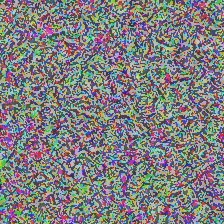

step: 100/500, loss: 0.0385764017701149
step: 200/500, loss: 0.11668084561824799
step: 300/500, loss: 0.044746868312358856
step: 400/500, loss: 0.0464019812643528


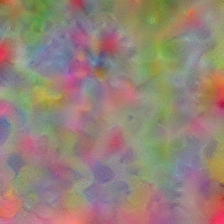

metric: distance | agg_fn: mean | exponent: 2.0
step: 0/500, loss: 11.063603401184082


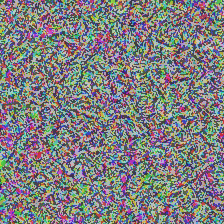

step: 100/500, loss: 0.081268310546875
step: 200/500, loss: 0.043098609894514084
step: 300/500, loss: 0.08363623917102814
step: 400/500, loss: 0.0332554429769516


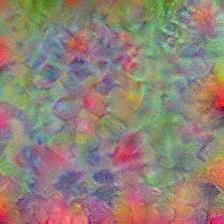

metric: distance | agg_fn: mean_log | exponent: 1.0
step: 0/500, loss: 11.063603401184082


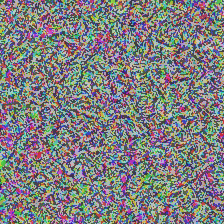

step: 100/500, loss: 0.07153725624084473
step: 200/500, loss: 0.16155198216438293
step: 300/500, loss: 0.06019063666462898
step: 400/500, loss: 0.04417451098561287


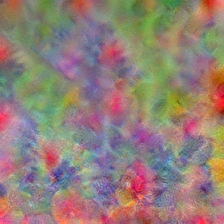

metric: distance | agg_fn: mean_log | exponent: 2.0
step: 0/500, loss: 11.063603401184082


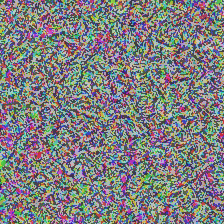

step: 100/500, loss: 0.08862554281949997
step: 200/500, loss: 0.1960131824016571
step: 300/500, loss: 0.08707787096500397
step: 400/500, loss: 0.20243805646896362


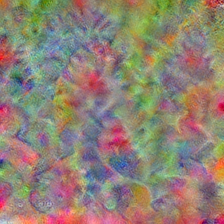

metric: similarity | agg_fn: mean | exponent: 1.0
step: 0/500, loss: 11.063603401184082


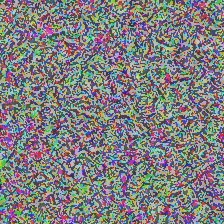

step: 100/500, loss: 0.2219521701335907
step: 200/500, loss: 0.10899011045694351
step: 300/500, loss: 0.2609109878540039
step: 400/500, loss: 0.06393993645906448


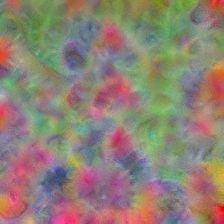

metric: similarity | agg_fn: mean | exponent: 2.0
step: 0/500, loss: 11.063603401184082


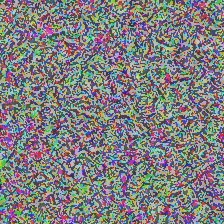

step: 100/500, loss: 0.32168832421302795
step: 200/500, loss: 0.11730802804231644
step: 300/500, loss: 0.10688377916812897
step: 400/500, loss: 0.2164590060710907


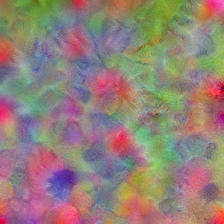

metric: similarity | agg_fn: mean_log | exponent: 1.0
step: 0/500, loss: 11.063603401184082


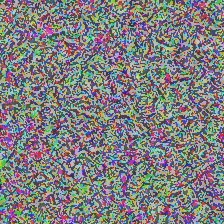

step: 100/500, loss: 0.10382672399282455
step: 200/500, loss: 0.035244692116975784
step: 300/500, loss: 0.12743178009986877
step: 400/500, loss: 0.14332519471645355


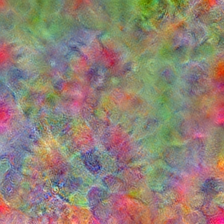

metric: similarity | agg_fn: mean_log | exponent: 2.0
step: 0/500, loss: 11.063603401184082


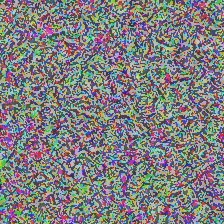

step: 100/500, loss: 0.0474570170044899
step: 200/500, loss: 0.43770402669906616
step: 300/500, loss: 0.03766834735870361
step: 400/500, loss: 0.28757214546203613


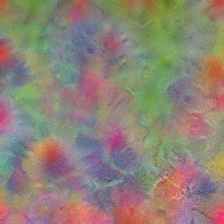

In [4]:
ptypes = [(188,1)]

transforms = [ClampingMinMax(0, 1)]
parametrization_transforms = [NormalizationMeanStd()]
robustness_transforms = [tfs.GaussianBlur(7, 2)]
denormalization_transforms = [DenormalizationMeanStd()]


size = (3, 224, 224)
input_tensor = torch.rand(size)   
for metric in ["distance", "similarity"]:
    for agg_fn in ["mean", "mean_log"]:
        for exponent in [1., 2.]:
            print(f"metric: {metric} | agg_fn: {agg_fn} | exponent: {exponent}")
            loss_agg_fn = AggregationFn(metric=metric, agg_fn=agg_fn, exponent=exponent).to(device)
            image = visualize_prototypes(model, 
                                         ptypes,
                                         optimization_steps=500, 
                                         input_tensor=input_tensor,
                                         transforms=transforms, 
                                         robustness_transforms=robustness_transforms,
                                         parametrization_transforms=parametrization_transforms,
                                         denormalization_transforms=denormalization_transforms,
                                         optimizer_kwargs={'lr': 0.2}, 
                                         print_interval=100,
                                         display_interval=500)
            pilimg = tfs.ToPILImage()(image)
            display(pilimg)

## Optimizing one prototype and one patch

step: 0/500, loss: 7.747802734375


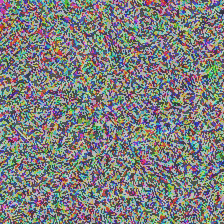

step: 100/500, loss: 0.129058837890625
step: 200/500, loss: 0.592498779296875
step: 300/500, loss: 0.0118255615234375
step: 400/500, loss: 0.02947998046875


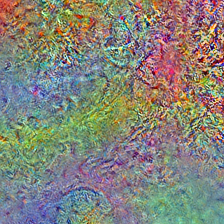

step: 0/500, loss: 9.692718505859375


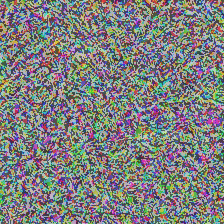

step: 100/500, loss: 0.0103302001953125
step: 200/500, loss: 0.0010986328125
step: 300/500, loss: 0.0121307373046875
step: 400/500, loss: 0.0094451904296875


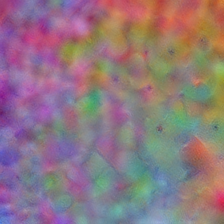

In [7]:
patches_mask1 = torch.zeros(7, 7, dtype=bool)
patches_mask1[0, 0] = True
patches_mask2 = torch.zeros(7, 7, dtype=bool)
patches_mask2[6, 6] = True
for patches_mask in [patches_mask1, patches_mask2]:
    loss_agg_fn = AggregationFn(patches_mask=patches_mask).to(device)
    image = visualize_prototypes(model, 
                                 ptypes, 
                                 loss_agg_fn=loss_agg_fn, 
                                 optimization_steps=500, 
                                 input_tensor=input_tensor,
                                 transforms=transforms, 
                                 robustness_transforms=robustness_transforms,
                                 parametrization_transforms=parametrization_transforms,
                                 denormalization_transforms=denormalization_transforms,
                                 optimizer_kwargs={'lr': 0.2}, 
                                 print_interval=100,
                                 display_interval=500)
    pilimg = tfs.ToPILImage()(image)
    display(pilimg)

## Optimizing all prototypes of one class

ptype_lvl_agg_fn: mean
step: 0/500, loss: 7.874820232391357


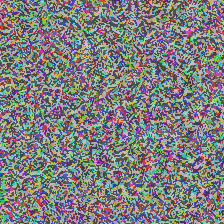

step: 100/500, loss: 3.7099967002868652
step: 200/500, loss: 3.725356101989746
step: 300/500, loss: 3.7202506065368652
step: 400/500, loss: 3.729166030883789


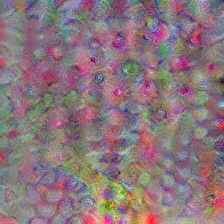

ptype_lvl_agg_fn: mean_log
step: 0/500, loss: 1.809656023979187


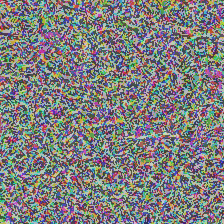

step: 100/500, loss: -0.3070148527622223
step: 200/500, loss: -0.44036102294921875
step: 300/500, loss: -0.6739819049835205
step: 400/500, loss: -0.5527896285057068


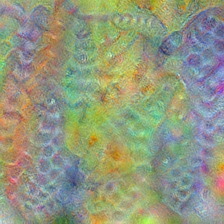

In [8]:
ptypes = [(188,i) for i in range(10)]

for ptype_lvl_agg_fn in ["mean", "mean_log"]:
    print(f"ptype_lvl_agg_fn: {ptype_lvl_agg_fn}")
    loss_agg_fn = AggregationFn(ptype_lvl_agg_fn=ptype_lvl_agg_fn).to(device)
    image = visualize_prototypes(model, 
                                 ptypes, 
                                 loss_agg_fn=loss_agg_fn, 
                                 optimization_steps=500, 
                                 input_tensor=input_tensor,
                                 transforms=transforms, 
                                 robustness_transforms=robustness_transforms,
                                 parametrization_transforms=parametrization_transforms,
                                 denormalization_transforms=denormalization_transforms,
                                 optimizer_kwargs={'lr': 0.2}, 
                                 print_interval=100,
                                 display_interval=500)
    pilimg = tfs.ToPILImage()(image)
    display(pilimg)